In [4]:
import sys
from pathlib import Path
import time
project_path = Path("/home/tolis/Desktop/tolis/DNN/project/DeepLearning_2024_2025_DSIT")
sys.path.append(str(project_path))
from utils.PDFSerlalizer import DocumentHandler
doc_path = "/home/tolis/Desktop/tolis/DNN/project/DeepLearning_2024_2025_DSIT/demos/cs_ai_2024_pdfs/test2.pdf"
doc_handler = DocumentHandler()
output_dir = "./output_demo/images"
start = time.time()
doc_handler.extract_images(doc_path, output_dir, verbose=True,export_pages=False, export_figures=True, export_tables=True,add_caption=True,filter_irrelevant=True)
print(f"Time: {time.time()-start:.2f} sec")

Could not load the custom kernel for multi-scale deformable attention: /home/tolis/miniconda3/bin/../lib/libstdc++.so.6: version `GLIBCXX_3.4.32' not found (required by /home/tolis/.cache/torch_extensions/py312_cu124/MultiScaleDeformableAttention/MultiScaleDeformableAttention.so)
Could not load the custom kernel for multi-scale deformable attention: /home/tolis/miniconda3/bin/../lib/libstdc++.so.6: version `GLIBCXX_3.4.32' not found (required by /home/tolis/.cache/torch_extensions/py312_cu124/MultiScaleDeformableAttention/MultiScaleDeformableAttention.so)
Could not load the custom kernel for multi-scale deformable attention: /home/tolis/miniconda3/bin/../lib/libstdc++.so.6: version `GLIBCXX_3.4.32' not found (required by /home/tolis/.cache/torch_extensions/py312_cu124/MultiScaleDeformableAttention/MultiScaleDeformableAttention.so)
Could not load the custom kernel for multi-scale deformable attention: /home/tolis/miniconda3/bin/../lib/libstdc++.so.6: version `GLIBCXX_3.4.32' not found (

Image extraction started for /home/tolis/Desktop/tolis/DNN/project/DeepLearning_2024_2025_DSIT/demos/cs_ai_2024_pdfs/test2.pdf...
Skipping irrelevant image.
Skipping irrelevant image.
Skipping irrelevant image.
Skipping irrelevant image.
Skipping irrelevant image.
Skipping irrelevant image.
Skipping irrelevant image.
Skipping irrelevant image.
Skipping irrelevant image.
Skipping irrelevant image.
Skipping irrelevant image.
Skipping irrelevant image.
Skipping irrelevant image.
Skipping irrelevant image.
Images extracted and saved to ./output_demo/images in 8.15 seconds.
Time: 8.15 sec


`Qwen2VLRotaryEmbedding` can now be fully parameterized by passing the model config through the `config` argument. All other arguments will be removed in v4.46


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

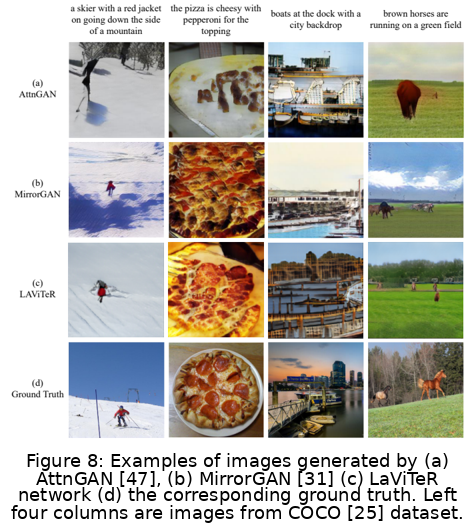

Summary: 
['This figure presents examples of images generated by different networks (AttnGAN, MirrorGAN, LAViTeR, and Ground Truth) for the COCO dataset, showcasing the diversity and quality of generated images.']


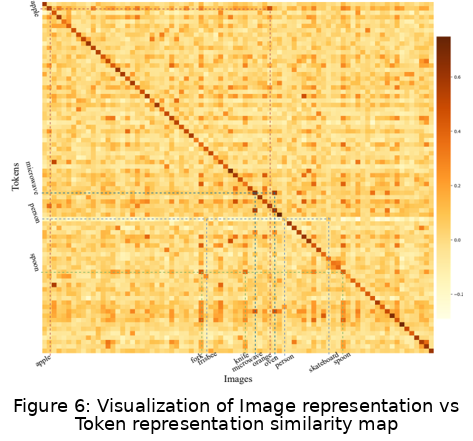

Summary: 
['The figure/table illustrates a visualization of image representation vs token representation similarity map, showing the correlation between different image and token representations.']


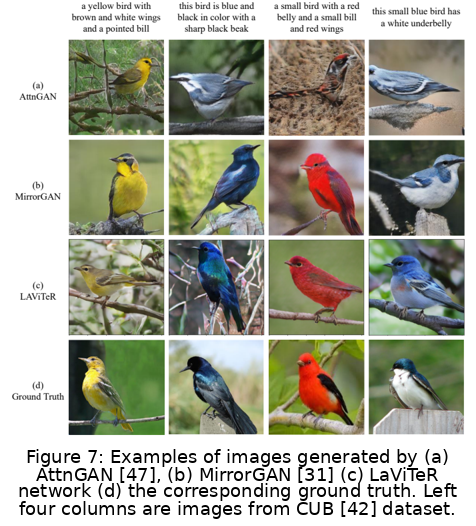

Summary: 
['This figure presents examples of images generated by different generative adversarial networks (GANs) on the CUB dataset, showcasing the diversity and quality of generated images compared to the corresponding ground truth.']


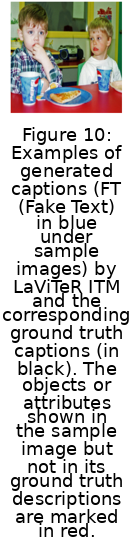

Summary: 
['This figure/table illustrates the performance of LaViTeR ITM on generating captions for sample images, comparing them to ground truth captions.']


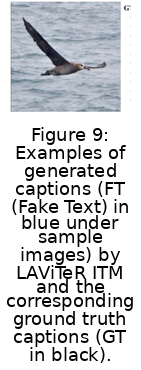

Summary: 
['This figure/table illustrates examples of generated captions (FT) and corresponding ground truth captions (GT) for a specific dataset, showcasing the effectiveness of the LAViTeR ITM in generating accurate captions from images.']


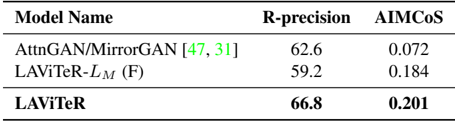

Summary: 
['The figure/table compares the R-precision and AIMCos metrics for different models, highlighting the performance of LAViTeR-L_M (F) and LAViTeR on the given dataset.']


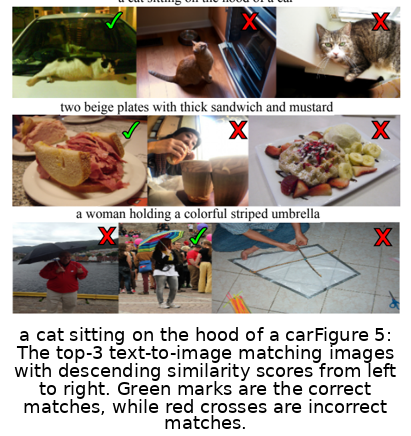

Summary: 
['This figure/table presents a visual comparison of top-text-to-image matching images, highlighting descending similarity scores from left to right, with green marks indicating correct matches and red crosses indicating incorrect ones.']


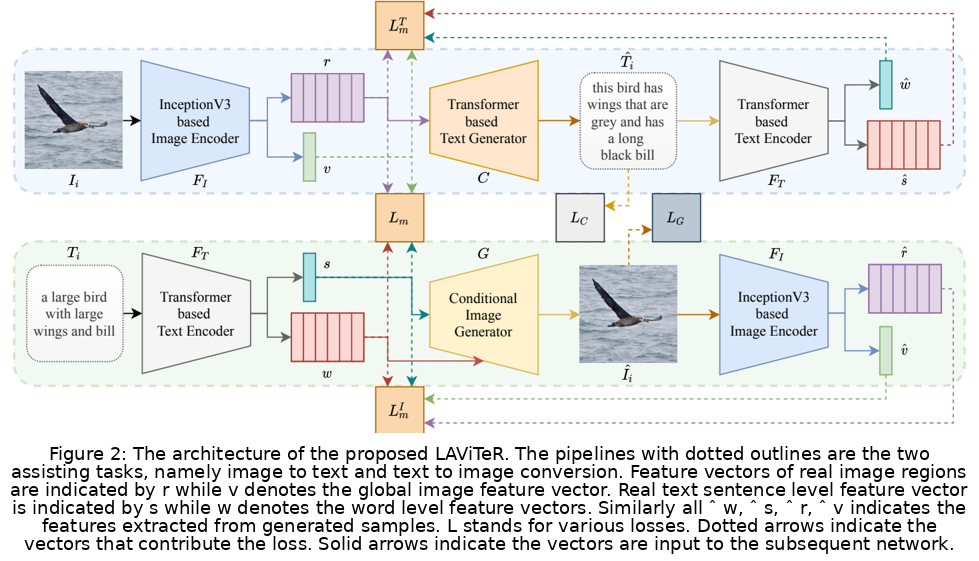

Summary: 
['This figure presents the architecture of the proposed LAViTeR model, detailing the pipeline for image-to-text and text-to-image conversion tasks.']


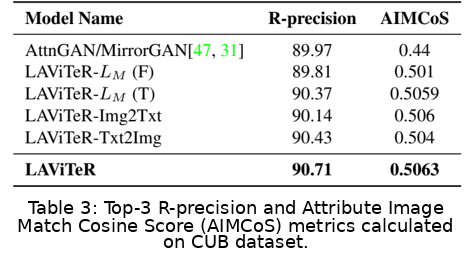

Summary: 
['This figure/table presents the top-3 R-precision and Attribute Image Match Cosine Score (AIMCos) metrics calculated on the CUB dataset using different models.']


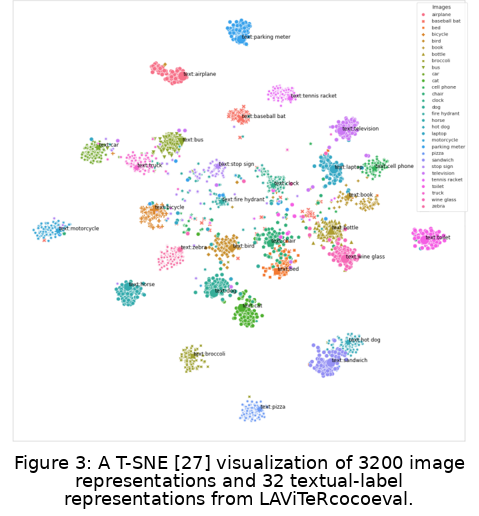

Summary: 
['A T-SNE visualization of 3200 image representations and 32 textual-label representations from LAViTeRcocoeval.']


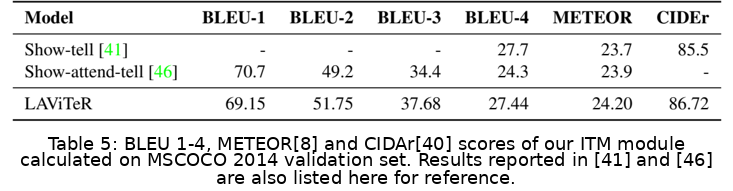

Summary: 
['A table comparing BLEU-1, BLEU-2, BLEU-3, BLEU-4, METEOR, and CIDEr scores for different models on the MSCOCO 2014 validation set.']


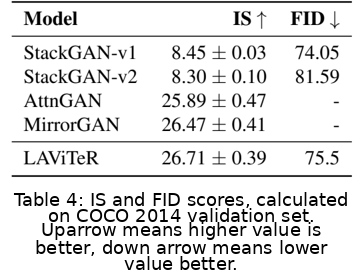

Summary: 
['This figure/table presents the IS and FID scores calculated on the COCO 2014 validation set for various models, with StackGAN-v1 achieving the highest IS score of 8.45 ± 0.03 and the lowest FID score of 74.05.']


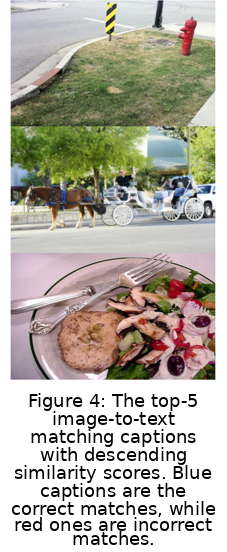

Summary: 
['The figure shows the top-5 image-to-text matching captions with descending similarity scores, highlighting the correct matches in blue and incorrect ones in red.']


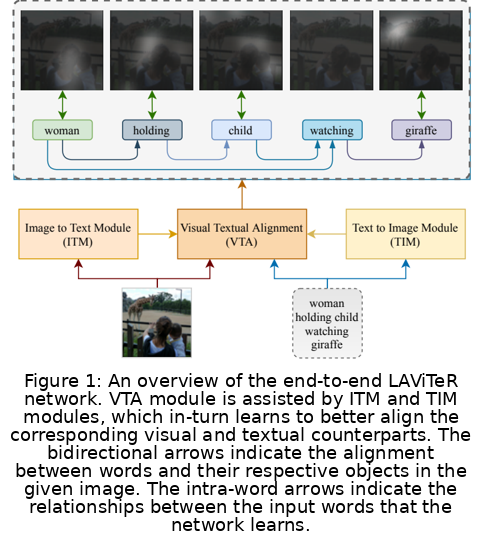

Summary: 
['An end-to-end LAViTeR network for visual-to-text and text-to-image alignment.']


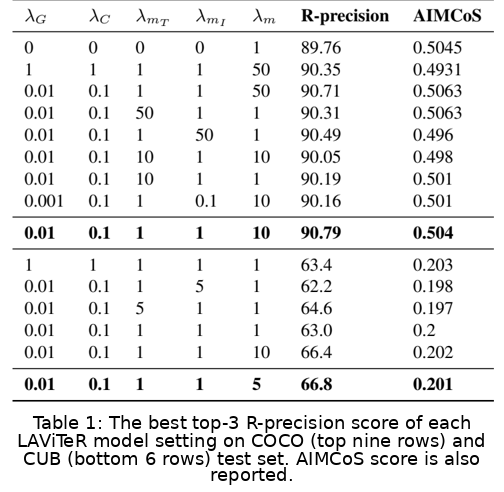

Summary: 
['Table 1: The best top-3 R-precision score of each LAViTeR model setting on COCO (top nine rows) and CUB (bottom six rows) test set. AIMCoS score is also reported.']
Full time: 12.82 sec


In [1]:
from transformers import Qwen2VLForConditionalGeneration, AutoTokenizer, AutoProcessor
from qwen_vl_utils import process_vision_info
import torch
import os
import time
from PIL import Image
from IPython.display import Image as ImageDisplay, display

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

input_folder = "/home/tolis/Desktop/tolis/DNN/project/DeepLearning_2024_2025_DSIT/demos/output_demo/images/"

model = Qwen2VLForConditionalGeneration.from_pretrained(
    "Qwen/Qwen2-VL-2B-Instruct",
    torch_dtype=torch.bfloat16,
    attn_implementation="flash_attention_2",
    device_map="auto",
).to(device)  
processor_llm = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-2B-Instruct")

full_time = 0

for file in os.listdir(input_folder):
    image_path = os.path.join(input_folder, file)
    image = Image.open(image_path)
    image_display = ImageDisplay(filename=image_path)
    display(image_display)

    start = time.time()
    
    messages = [
        {
            "role": "user",
            "content": [
                {"type": "image", "image": image_path},
                {
                    "type": "text",
                    "text": """
                                Given this figure/table from a scientific paper, provide a single technically precise sentence that:
                                1. States the type of visualization (e.g., graph, diagram, table)
                                2. Describes the main scientific concept or finding shown
                                3. Mentions key variables or metrics involved

                                Keep the description under 50 words while preserving technical terminology. Focus on the core message rather than specific numerical details.
                            """,
                },
            ],
        }
    ]

    text = processor_llm.apply_chat_template(
        messages, tokenize=False, add_generation_prompt=True
    )
    image_inputs, video_inputs = process_vision_info(messages)

    inputs = processor_llm(
        text=[text],
        images=image_inputs,
        videos=video_inputs,
        padding=True,
        return_tensors="pt",
    )

    inputs = {key: value.to(device) for key, value in inputs.items()}

    generated_ids = model.generate(**inputs, max_new_tokens=128)
    generated_ids_trimmed = [
        out_ids[len(in_ids):] for in_ids, out_ids in zip(inputs["input_ids"], generated_ids)
    ]
    output_text = processor_llm.batch_decode(
        generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
    )

    print(f"Summary: \n{output_text}")
    full_time += time.time() - start

print(f"Full time: {full_time:.2f} sec")


In [4]:
output_dir = "./output_demo/"
markdown_path = doc_handler.docling_serialize(doc_path, output_dir,verbose=True,output_format="markdown")
markdown_path

/home/tolis/.local/lib/python3.12/site-packages/torch/utils/cpp_extension.py:1964: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Could not load the custom kernel for multi-scale deformable attention: /home/tolis/miniconda3/bin/../lib/libstdc++.so.6: version `GLIBCXX_3.4.32' not found (required by /home/tolis/.cache/torch_extensions/py312_cu124/MultiScaleDeformableAttention/MultiScaleDeformableAttention.so)
Could not load the custom kernel for multi-scale deformable attention: /home/tolis/miniconda3/bin/../lib/libstdc++.so.6: version `GLIBCXX_3.4.32' not found (required by /home/tolis/.cache/torch_extensions/py312_cu124/MultiScaleDeformableAttention/MultiScaleDeformableAttention.so)
Could not load the custom kernel for multi-scale deformable attention: /home/tolis/miniconda3/bin/../lib/libstdc++.so.6: version `GLIBCXX_3.4.32' not found (requi

Conversion took 7.38 seconds


'./output_demo/images/test2_docling.md'

In [17]:
from langchain_ollama import ChatOllama
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.chains.summarize import load_summarize_chain
from langchain.document_transformers import EmbeddingsClusteringFilter
from langchain.embeddings import HuggingFaceBgeEmbeddings
from langchain.schema import Document



def read_markdown_file(file_path):
    """Reads the content of the Markdown file."""
    with open(file_path, "r", encoding="utf-8") as file:
        content = file.read()
    return content


def extract_from_markdown(markdown_path):
    """Extracts and splits text from the Markdown file."""
    content = read_markdown_file(markdown_path)
    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=2000, chunk_overlap=0
    )
    texts = text_splitter.split_text(content)
    documents = [Document(page_content=text) for text in texts]
    return documents

def summarize_document_with_kmeans_clustering(doc_path, output_dir, llm, embeddings):
    """Summarizes the document using KMeans clustering."""
    markdown_path = doc_handler.docling_serialize(doc_path, output_dir, verbose=True, output_format="markdown")

    texts = extract_from_markdown(markdown_path)

    filter = EmbeddingsClusteringFilter(embeddings=embeddings, num_clusters=10)

    try:
        result = filter.transform_documents(documents=texts)
        checker_chain = load_summarize_chain(llm, chain_type="stuff")
        summary = checker_chain.run(result)
        return summary
    except Exception as e:
        return str(e)

model_name = "BAAI/bge-base-en-v1.5"
model_kwargs = {"device": "cuda"}  
encode_kwargs = {"normalize_embeddings": True}

embeddings = HuggingFaceBgeEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs
)

llm = ChatOllama(  
    model="qwen2.5:7b-instruct",
    temperature=0
)

print(summarize_document_with_kmeans_clustering(doc_path, "/home/tolis/Desktop/tolis/DNN/project/DeepLearning_2024_2025_DSIT/demos/output_demo", llm, embeddings))


Could not load the custom kernel for multi-scale deformable attention: /home/tolis/miniconda3/bin/../lib/libstdc++.so.6: version `GLIBCXX_3.4.32' not found (required by /home/tolis/.cache/torch_extensions/py312_cu124/MultiScaleDeformableAttention/MultiScaleDeformableAttention.so)
Could not load the custom kernel for multi-scale deformable attention: /home/tolis/miniconda3/bin/../lib/libstdc++.so.6: version `GLIBCXX_3.4.32' not found (required by /home/tolis/.cache/torch_extensions/py312_cu124/MultiScaleDeformableAttention/MultiScaleDeformableAttention.so)
Could not load the custom kernel for multi-scale deformable attention: /home/tolis/miniconda3/bin/../lib/libstdc++.so.6: version `GLIBCXX_3.4.32' not found (required by /home/tolis/.cache/torch_extensions/py312_cu124/MultiScaleDeformableAttention/MultiScaleDeformableAttention.so)
Could not load the custom kernel for multi-scale deformable attention: /home/tolis/miniconda3/bin/../lib/libstdc++.so.6: version `GLIBCXX_3.4.32' not found (

Conversion took 5.01 seconds


KeyboardInterrupt: 

In [6]:
from transformers import pipeline
import torch
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

def read_markdown_file(file_path):
    """Reads the content of the Markdown file."""
    with open(file_path, "r", encoding="utf-8") as file:
        return file.read()

def truncate_text(text, max_tokens):
    """Truncates text to the maximum number of tokens allowed by the model."""
    return ' '.join(text.split()[:max_tokens])

device = 0 if torch.cuda.is_available() else -1
if device == -1:
    print("GPU not available. Running on CPU...")
else:
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")

markdown_path = doc_handler.docling_serialize(
    doc_path, 
    output_dir, 
    verbose=True, 
    output_format="markdown", 
    do_table_structure=False
)

text = read_markdown_file(markdown_path)
max_input_length = 1024  

truncated_text = truncate_text(text, max_input_length)

summarizer = pipeline("summarization", model="facebook/bart-large-cnn", device=-1)

try:
    summary = summarizer(truncated_text, max_length=130, min_length=30, do_sample=False)
    print("Summary:")
    print(summary[0]['summary_text'])
except Exception as e:
    print(f"Error during summarization: {e}")


Using GPU: NVIDIA GeForce RTX 4060 Laptop GPU


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [3]:
from transformers import pipeline, AutoTokenizer
import torch

model_name = "facebook/bart-large-cnn"
summarizer = pipeline("summarization", model=model_name, device=-1)
tokenizer = AutoTokenizer.from_pretrained(model_name)

def read_markdown_file(file_path):
    """Reads the content of the Markdown file."""
    with open(file_path, "r", encoding="utf-8", errors="ignore") as file:
        content = file.read()
    return content

def split_text_into_chunks(text, max_token_length):
    """
    Splits the text into chunks that fit within the model's maximum token limit.
    Ensures chunks don't exceed BART's maximum position embedding limit.
    """
    max_length = min(max_token_length, 1024)
    
    tokens = tokenizer.encode(text, truncation=False, add_special_tokens=False)
    chunks = []
    
    for i in range(0, len(tokens), max_length):
        # Leave room for special tokens ([BOS], [EOS])
        chunk_tokens = tokens[i:i + max_length - 2]
        chunk_text = tokenizer.decode(chunk_tokens, skip_special_tokens=True)
        chunks.append(chunk_text)
    
    return chunks

def summarize_text(text, max_chunk_length=1024):
    """
    Summarizes text while handling potential errors.
    """
    try:
        chunks = split_text_into_chunks(text, max_chunk_length)
        
        summaries = []
        for chunk in chunks:
            if len(chunk.strip()) > 0:  
                try:
                    summary = summarizer(chunk, 
                                       max_length=130, 
                                       min_length=30, 
                                       do_sample=False,
                                       truncation=True)
                    summaries.append(summary[0]['summary_text'])
                except Exception as e:
                    print(f"Error processing chunk: {str(e)}")
                    continue
        
        final_summary = " ".join(summaries)
        return final_summary
    
    except Exception as e:
        print(f"Error in summarization process: {str(e)}")
        return None
    
    
try:
    text = read_markdown_file(doc_path)
    
    final_summary = summarize_text(text)
    
    if final_summary:
        print("Summary generated successfully:")
        print(final_summary)
        
        with open(f"{output_dir}summary.txt", "w", encoding="utf-8") as f:
            f.write(final_summary)
            
except Exception as e:
    print(f"Error in main execution: {str(e)}")

Device set to use cpu
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Error processing chunk: index out of range in self


KeyboardInterrupt: 

In [1]:
import sys
from pathlib import Path
import time
project_path = Path("/home/tolis/Desktop/tolis/DNN/project/DeepLearning_2024_2025_DSIT")
sys.path.append(str(project_path))
from utils.PDFSerlalizer import DocumentHandler
doc_path = "/home/tolis/Desktop/tolis/DNN/project/DeepLearning_2024_2025_DSIT/demos/cs_ai_2024_pdfs/test2.pdf"
doc_handler = DocumentHandler()
output_dir = "./output_demo/"
def read_markdown_file(file_path):
    """Reads the content of the Markdown file."""
    with open(file_path, "r", encoding="utf-8", errors="ignore") as file:
        content = file.read()
    return content
markdown_path = doc_handler.docling_serialize(
    doc_path, 
    output_dir, 
    verbose=True, 
    output_format="markdown", 
    do_table_structure=False
)
text = read_markdown_file(markdown_path)


/home/tolis/.local/lib/python3.12/site-packages/torch/utils/cpp_extension.py:1964: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Could not load the custom kernel for multi-scale deformable attention: /home/tolis/miniconda3/bin/../lib/libstdc++.so.6: version `GLIBCXX_3.4.32' not found (required by /home/tolis/.cache/torch_extensions/py312_cu124/MultiScaleDeformableAttention/MultiScaleDeformableAttention.so)
Could not load the custom kernel for multi-scale deformable attention: /home/tolis/miniconda3/bin/../lib/libstdc++.so.6: version `GLIBCXX_3.4.32' not found (required by /home/tolis/.cache/torch_extensions/py312_cu124/MultiScaleDeformableAttention/MultiScaleDeformableAttention.so)
Could not load the custom kernel for multi-scale deformable attention: /home/tolis/miniconda3/bin/../lib/libstdc++.so.6: version `GLIBCXX_3.4.32' not found (requi

Conversion took 9.10 seconds


Since all methods for summarization above were too slow, we will use the sumpy package.

In [2]:
import spacy
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words

def remove_names(text):
    nlp = spacy.load('en_core_web_sm')
    
    # Process the text
    doc = nlp(text)
    
    tokens = []
    for token in doc:
        if token.ent_type_ != 'PERSON' and token.ent_type_ != 'GPE':
            tokens.append(token.text)
    
    return ' '.join(tokens)

def summarize_text(text, sentences_count=3, language="english"):
    text = remove_names(text)
    
    parser = PlaintextParser.from_string(text, Tokenizer(language))
    
    stemmer = Stemmer(language)
    summarizer = LsaSummarizer(stemmer)
    summarizer.stop_words = get_stop_words(language)
    
    summary = summarizer(parser.document, sentences_count)
    
    return " ".join([str(sentence) for sentence in summary])

summary = summarize_text(text)
print(summary)

Pre - training visual and textual representations from large - scale image - text pairs is becoming a standard approach for many downstream vision - language tasks . The experimental results on two public datasets , CUB and MS - COCO , demonstrate superior visual and textual representation alignment in the joint feature embedding space . In Proceedings of the 2019 Conference of the North American Chapter of the Association for Computational Linguistics : Human Language Technologies , Volume 1 ( Long and Short Papers ) , pages 4171 - 4186 , , , June 2019 .


`Qwen2VLRotaryEmbedding` can now be fully parameterized by passing the model config through the `config` argument. All other arguments will be removed in v4.46


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

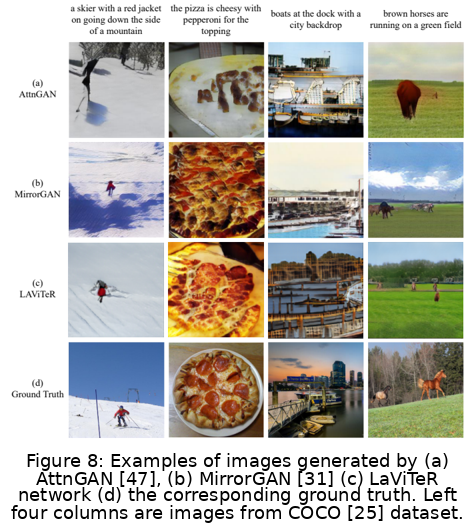

Summary: 
['This figure presents examples of images generated by different networks (AttnGAN, MirrorGAN, LAViTeR) and their corresponding ground truth images from the COCO dataset, demonstrating the effectiveness of visual and textual representation alignment in the joint feature embedding space.']


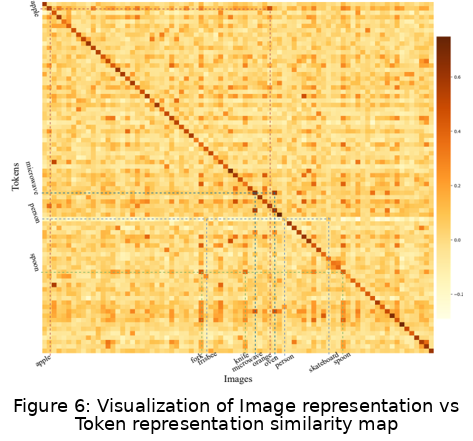

Summary: 
['This figure presents a visualization of image representation vs token representation similarity map, demonstrating superior alignment in the joint feature embedding space for visual and textual tasks on CUB and MS-COCO datasets.']


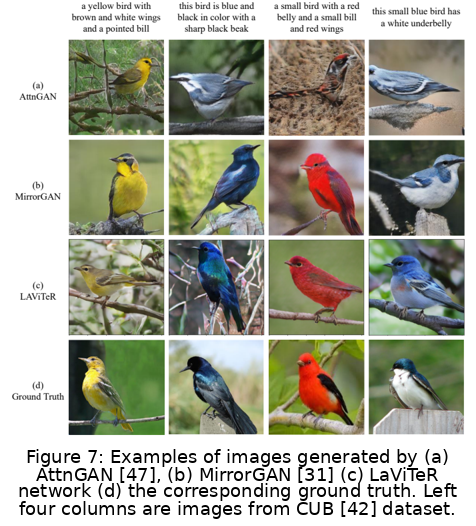

Summary: 
['This figure presents examples of images generated by different models (AttnGAN, MirrorGAN, LAViTeR, Ground Truth) and their corresponding ground truth images from the CUB dataset, demonstrating superior visual and textual representation alignment in the joint feature embedding space.']


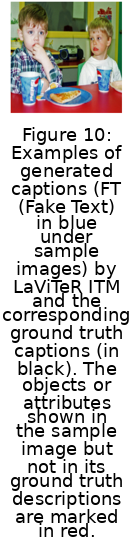

Summary: 
['This figure/table illustrates examples of generated captions (FT) by LaViTeR ITM and their corresponding ground truth captions, demonstrating superior visual and textual representation alignment in the joint feature embedding space.']


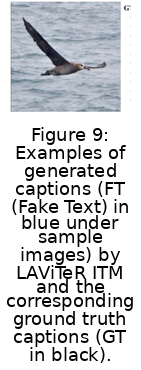

Summary: 
['This figure presents examples of generated captions (FT (Fake Text) in blue under sample images) by LAViTeR ITM and the corresponding ground truth captions (GT in black), demonstrating superior visual and textual representation alignment in the joint feature embedding space.']


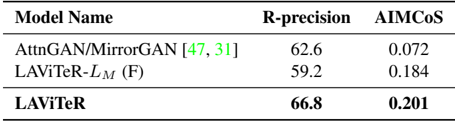

Summary: 
['The figure/table compares the R-precision and AIMCos metrics for different models on two datasets, demonstrating superior visual and textual representation alignment in the joint feature embedding space.']


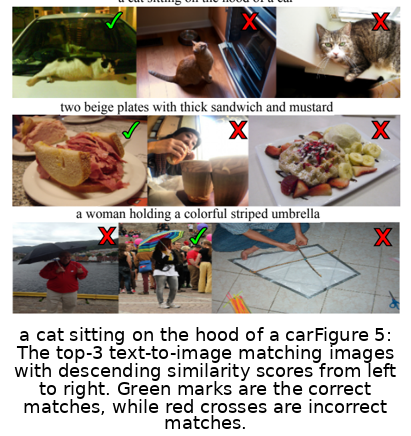

Summary: 
['This figure presents the top-3 text-to-image matching images with descending similarity scores from left to right, demonstrating superior visual and textual representation alignment in the joint feature embedding space.']


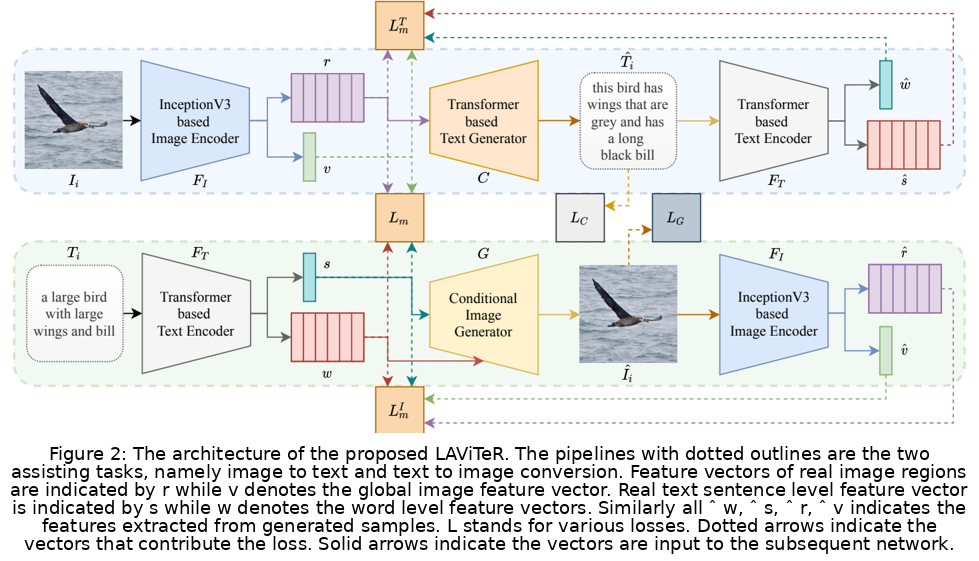

Summary: 
['This figure illustrates the architecture of the proposed LAViTeR model, which combines image and text representations for downstream vision-language tasks.']


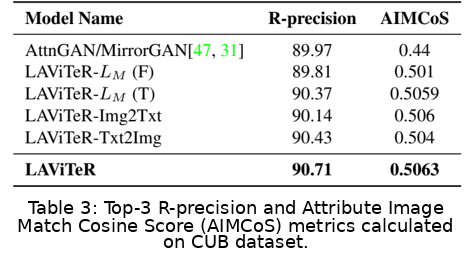

Summary: 
['This table compares the top-3 R-precision and Attribute Image Match Cosine Score (AIMCos) metrics of different models on the CUB dataset.']


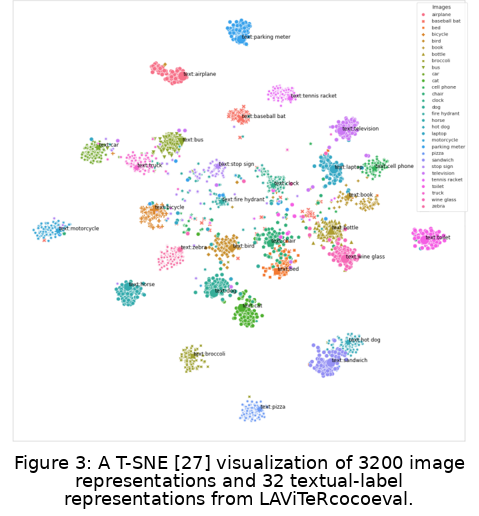

Summary: 
['A T-SNE visualization of 3200 image representations and 32 textual-label representations from LAViTeRcocoeval.']


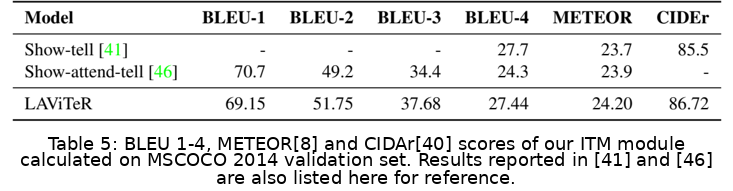

Summary: 
['The figure/table compares the BLEU-1, BLEU-2, BLEU-3, BLEU-4, METEOR, and CIDEr scores of the LAViTear model on the MS-COCO 2014 validation set, with other models such as Show-tell [41], Show-attend-tell [46], and LAViTear.']


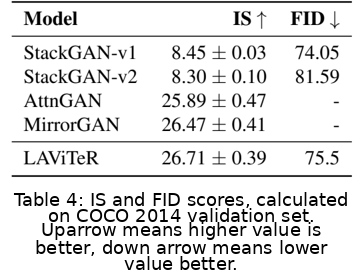

Summary: 
['This table compares the IS and FID scores of different models on the COCO 2014 validation set, with StackGAN-v1 and StackGAN-v2 achieving the highest IS score of 8.45 ± 0.03 and 8.30 ± 0.10, respectively.']


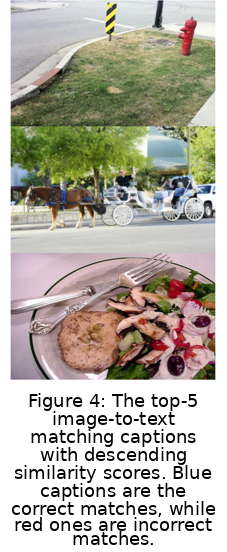

Summary: 
['This figure presents the top-5 image-to-text matching captions with descending similarity scores, demonstrating superior visual and textual representation alignment in the joint feature embedding space.']


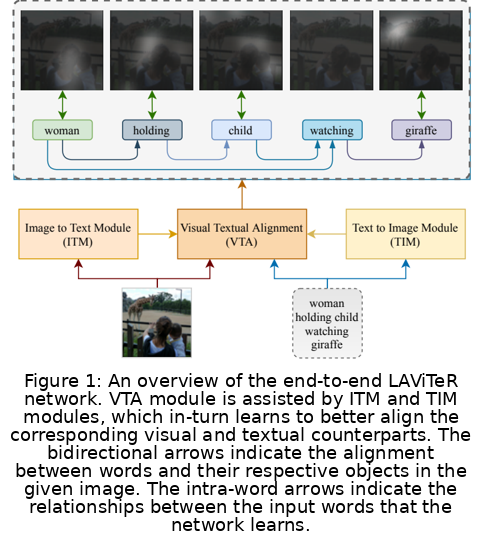

Summary: 
['An end-to-end LAViTeR network for visual-to-text and text-to-image alignment.']


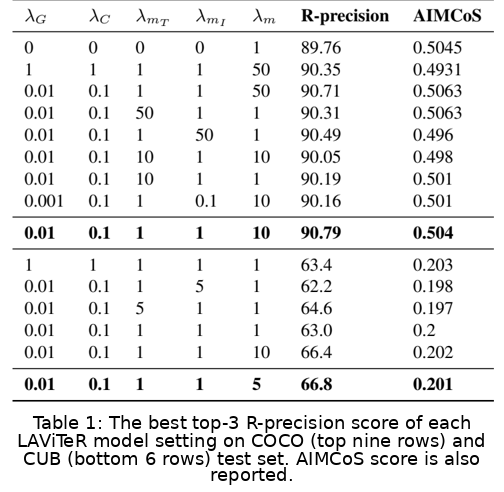

Summary: 
['The figure/table shows the best top-3 R-precision score of each LAViTeR model setting on COCO and CUB test sets, with AIMCoS score also reported.']
Full time: 21.76 sec


In [3]:
from transformers import Qwen2VLForConditionalGeneration, AutoTokenizer, AutoProcessor
from qwen_vl_utils import process_vision_info
import torch
import os
import time
from PIL import Image
from IPython.display import Image as ImageDisplay, display

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

input_folder = "/home/tolis/Desktop/tolis/DNN/project/DeepLearning_2024_2025_DSIT/demos/output_demo/images/"

model = Qwen2VLForConditionalGeneration.from_pretrained(
    "Qwen/Qwen2-VL-2B-Instruct",
    torch_dtype=torch.bfloat16,
    attn_implementation="flash_attention_2",
    device_map="auto",
).to(device)  
processor_llm = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-2B-Instruct")

full_time = 0

for file in os.listdir(input_folder):
    image_path = os.path.join(input_folder, file)
    image = Image.open(image_path)
    image_display = ImageDisplay(filename=image_path)
    display(image_display)

    start = time.time()
    
    messages = [
        {
            "role": "user",
            "content": [
                {"type": "image", "image": image_path},
                {
                    "type": "text",
                    "text": f"""
                                The tables or figures you will see are from a scientific paper in the field of computer science and artificial intelligence.
                                Some representetive text from the paper is: 
                                {summary}
                                
                                Given this figure/table from a scientific paper, provide a single technically precise sentence that:
                                1. States the type of visualization (e.g., graph, diagram, table)
                                2. Describes the main scientific concept or finding shown
                                3. Mentions key variables or metrics involved

                                Keep the description under 50 words while preserving technical terminology. Focus on the core message rather than specific numerical details.
                            """,
                },
            ],
        }
    ]

    text = processor_llm.apply_chat_template(
        messages, tokenize=False, add_generation_prompt=True
    )
    image_inputs, video_inputs = process_vision_info(messages)

    inputs = processor_llm(
        text=[text],
        images=image_inputs,
        videos=video_inputs,
        padding=True,
        return_tensors="pt",
    )

    inputs = {key: value.to(device) for key, value in inputs.items()}

    generated_ids = model.generate(**inputs, max_new_tokens=128)
    generated_ids_trimmed = [
        out_ids[len(in_ids):] for in_ids, out_ids in zip(inputs["input_ids"], generated_ids)
    ]
    output_text = processor_llm.batch_decode(
        generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
    )

    print(f"Summary: \n{output_text}")
    full_time += time.time() - start

print(f"Full time: {full_time:.2f} sec")
